In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport as Prt

In [84]:
df_conv = pd.read_csv("KAG_conversion_data.csv")

In [85]:
df_conv.head(10)

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   
5  708820              916          103929  30-34      M        29   
6  708889              916          103940  30-34      M        15   
7  708895              916          103941  30-34      M        16   
8  708953              916          103951  30-34      M        27   
9  708958              916          103952  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1  
5         1915       0   0.00                 1                    1  
6        15615       3   4.77                 1                    0  
7        10951       1   1.27                 1                    1  
8         2355       1   1.50                 1                    0  
9         9502       3   3.16                 1                    0

In [5]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class. Call by using AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)


Shape of your Data Set: (1143, 11)
Classifying variables in data set...
    10 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Nothing to add Plot not being added
Nothing to add Plot not being added
Could not draw Pivot Charts against Dependent Variable
Could not draw Bar Charts
Time to run AutoViz (in seconds) = 1.000


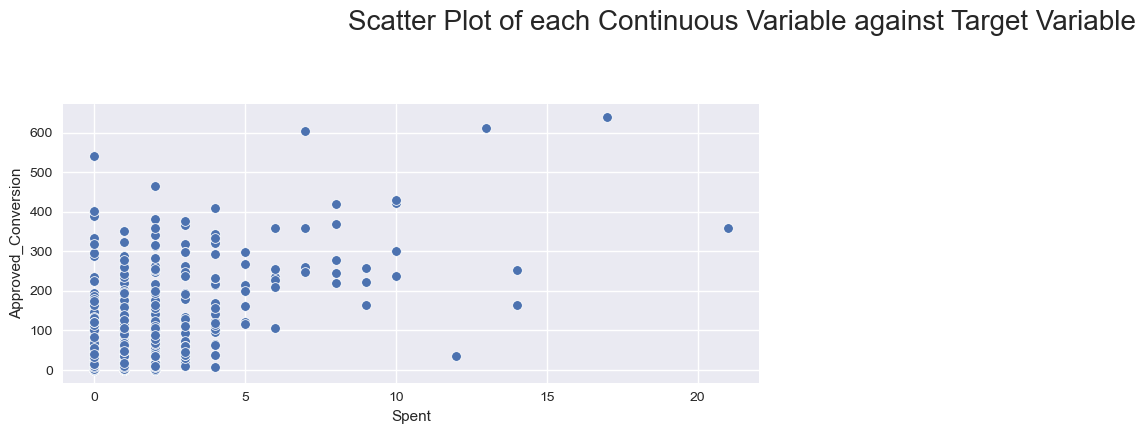

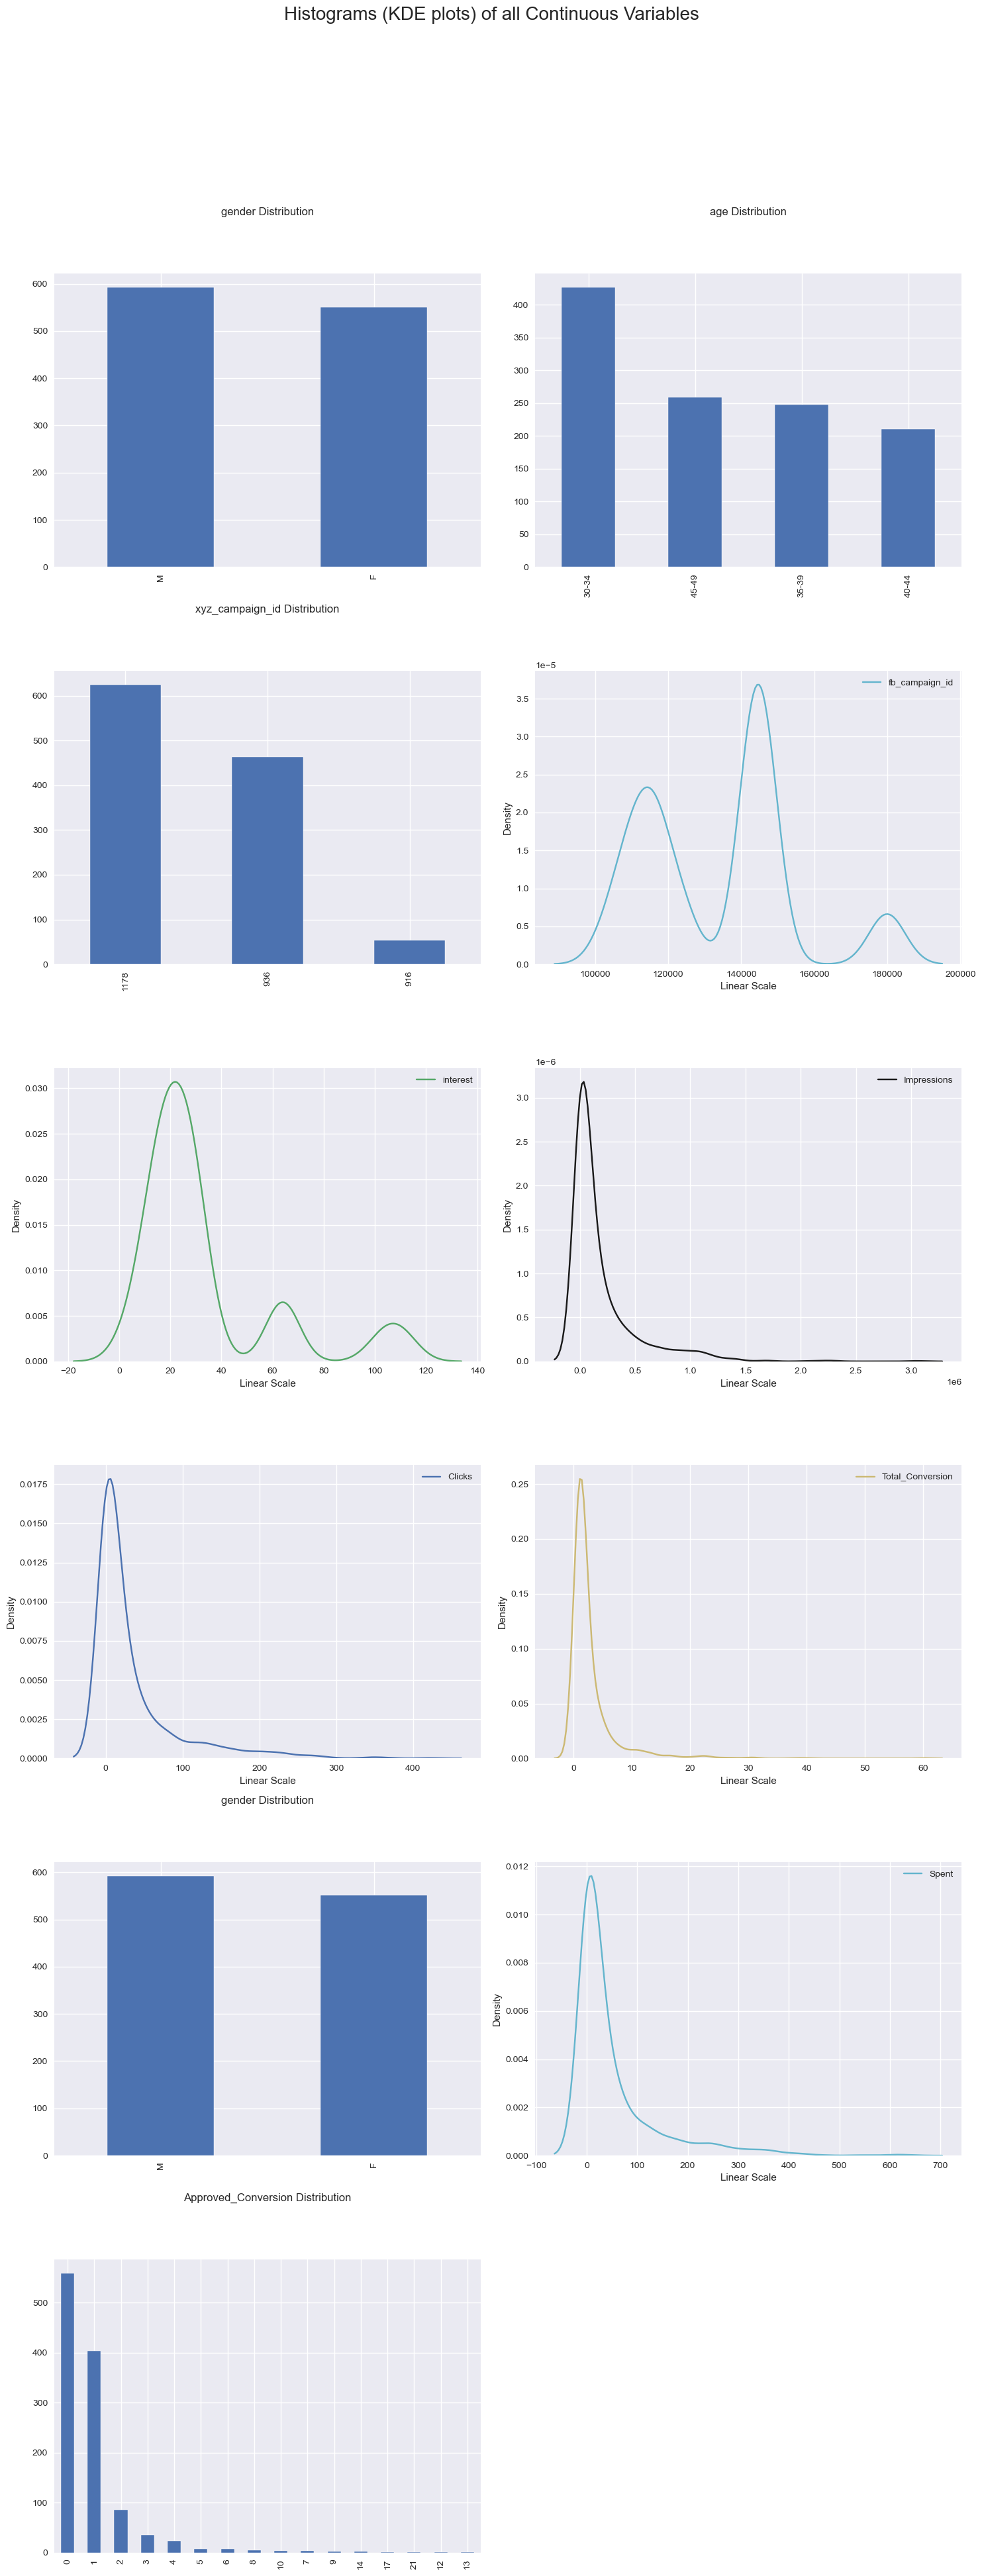

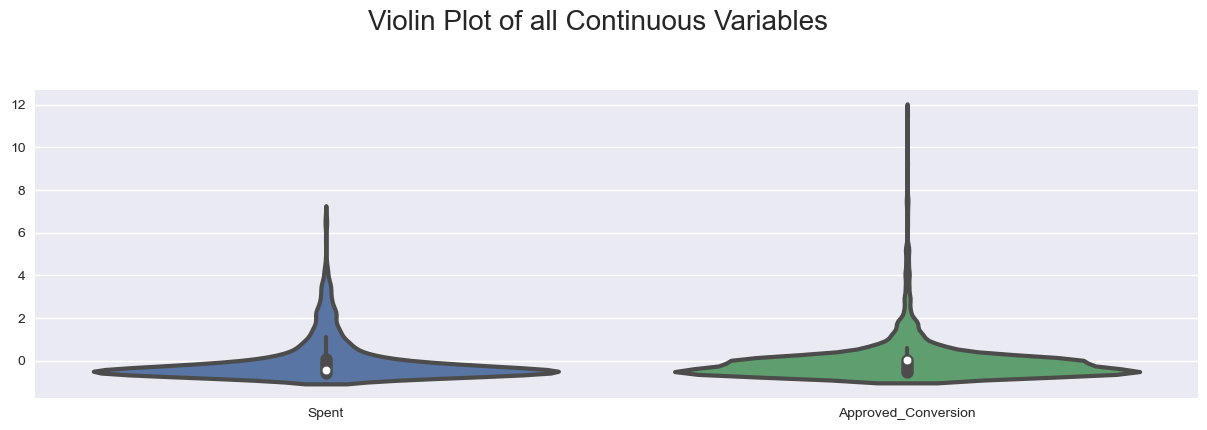

<Figure size 1500x2400 with 0 Axes>

<Figure size 1500x3600 with 0 Axes>

In [11]:
df1 = AV.AutoViz('KAG_conversion_data.csv', depVar="Approved_Conversion")

In [ ]:
df1 = AV.AutoViz('KAG_conversion_data.csv')

In [86]:
profile = Prt(df_conv, title="Report")
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

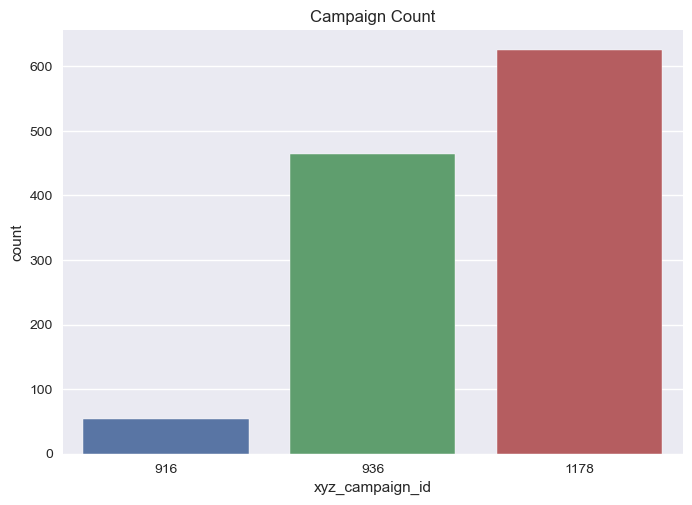

In [87]:
sns.countplot(x="xyz_campaign_id",data = df_conv).set_title("Campaign Count")
plt.show()

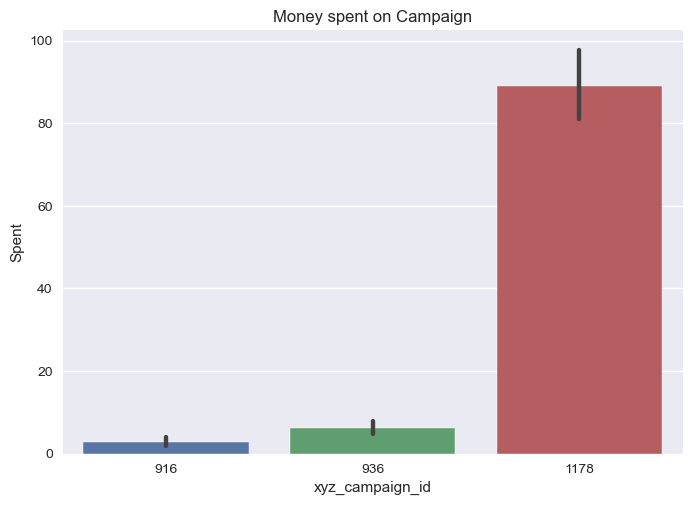

In [88]:
sns.barplot(x="xyz_campaign_id",y= "Spent",data = df_conv).set_title("Money spent on Campaign")
plt.show()

<AxesSubplot:>

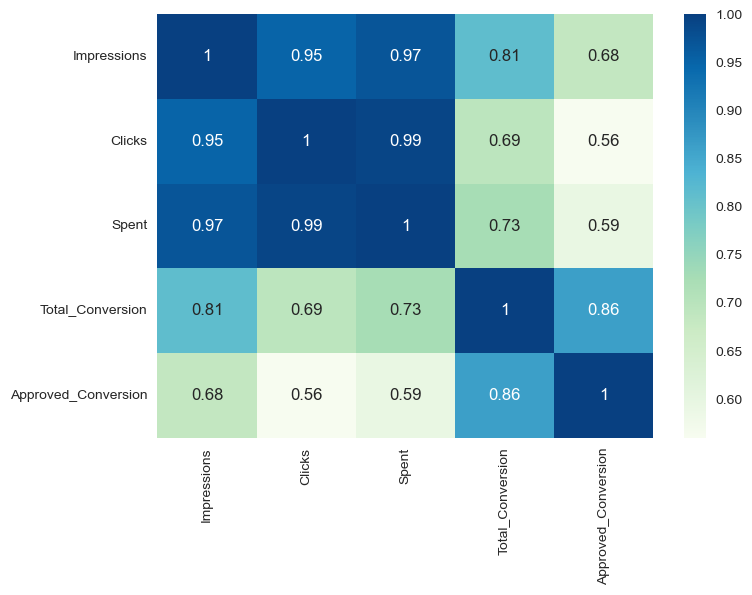

In [89]:
sns.heatmap(df_conv[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),
            annot=True,cmap="GnBu")

<AxesSubplot:xlabel='age', ylabel='Clicks'>

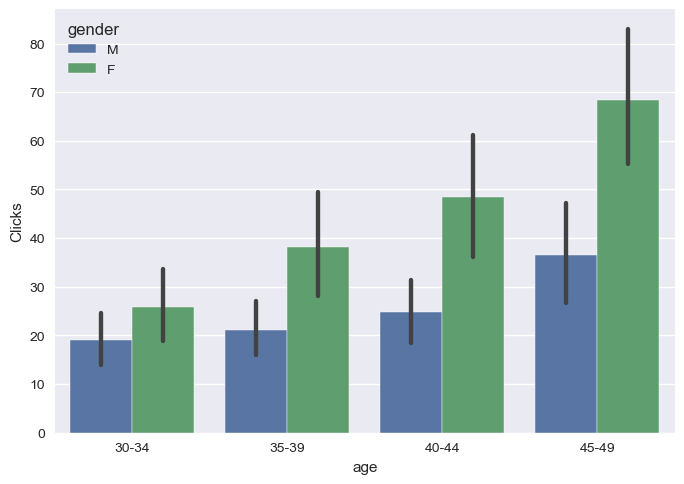

In [90]:
sns.barplot(x="age",y="Clicks", data = df_conv, hue= "gender")

<AxesSubplot:xlabel='age', ylabel='Clicks'>

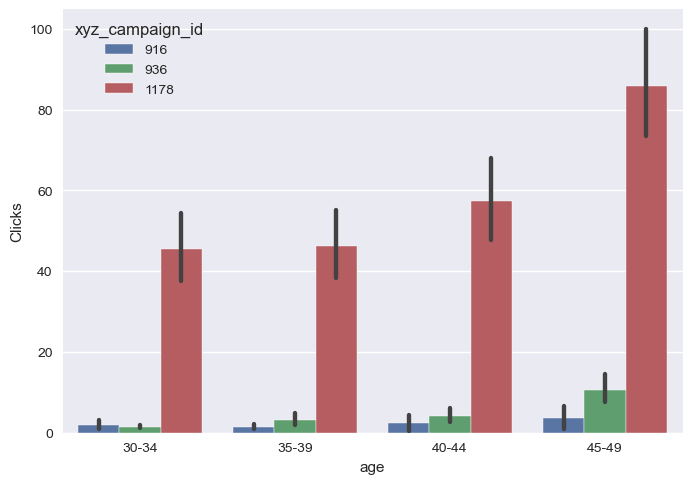

In [91]:
sns.barplot(x="age",y="Clicks", data = df_conv, hue = "xyz_campaign_id")

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

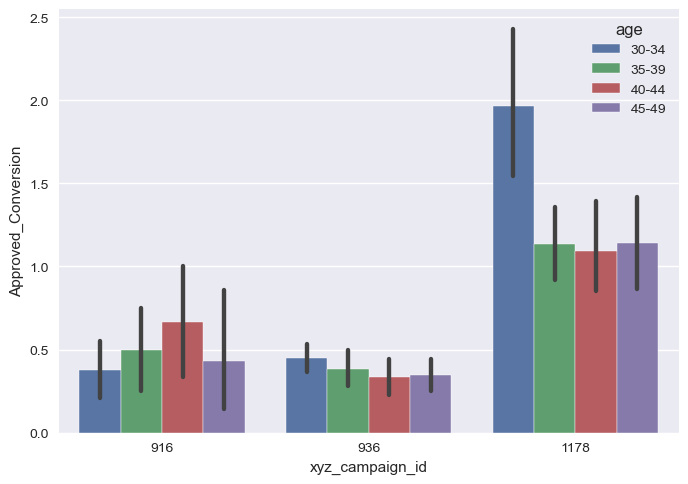

In [92]:
sns.barplot(x="xyz_campaign_id", y = "Approved_Conversion", hue= "age", data = df_conv)

<AxesSubplot:xlabel='age', ylabel='Spent'>

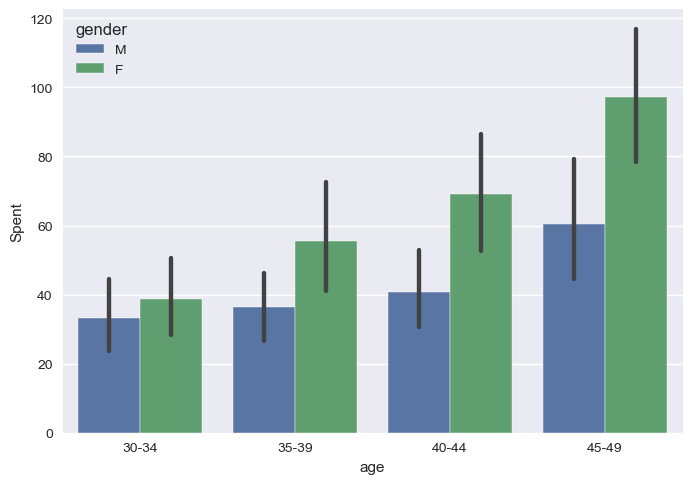

In [93]:
sns.barplot(x="age", y="Spent", hue= "gender",data = df_conv) 

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

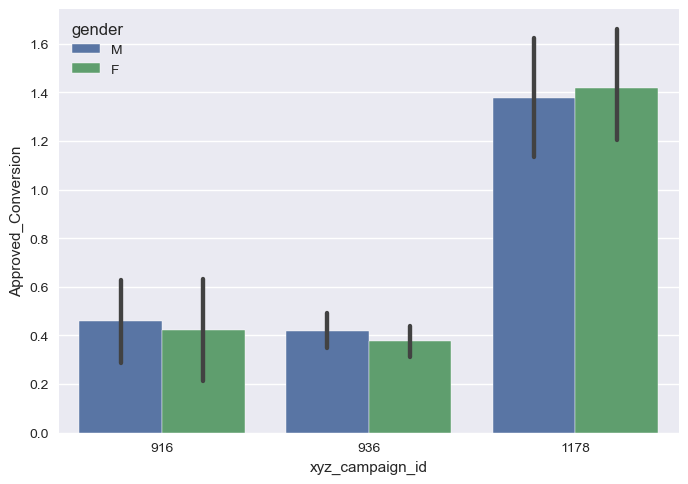

In [94]:
sns.barplot(x="xyz_campaign_id", y = "Approved_Conversion", hue= "gender", data = df_conv)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   int32  
 4   gender               1143 non-null   int32  
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int32(2), int64(8)
memory usage: 89.4 KB


In [195]:
#supposing each Approved_Conversion worth 100 dollars
df_conv['revenue']=df_conv['Approved_Conversion']*100
df_conv['profit']= df_conv.revenue-df_conv.Spent

<AxesSubplot:>

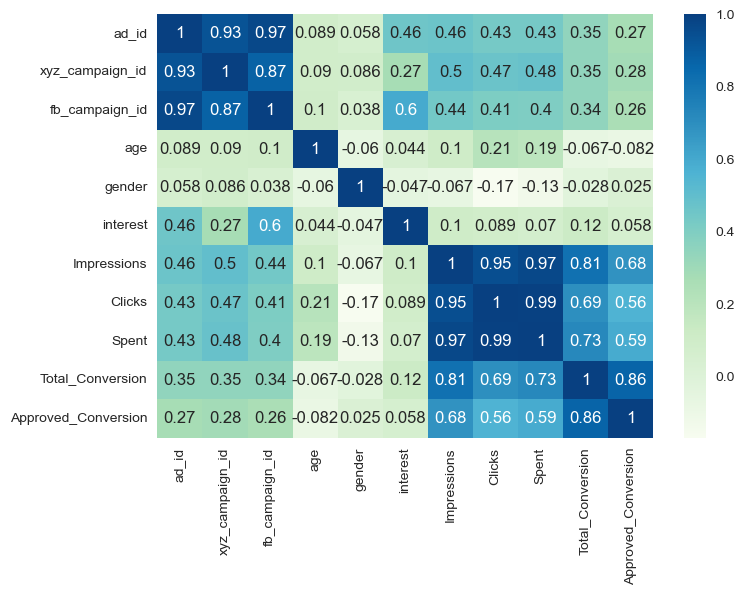

In [194]:
sns.heatmap(df_conv.corr(),
            annot=True,cmap="GnBu")

In [97]:
df11 = df_conv.groupby('xyz_campaign_id').agg({'Impressions': 'sum', 'Clicks': 'sum', 
                                                        'Spent': 'sum', 'Total_Conversion': 'sum', 
                                                        'Approved_Conversion': 'sum'})

In [98]:
df11.reset_index(inplace = True)
df11

xyz_campaign_id  Impressions  Clicks         Spent  Total_Conversion  \
0              916       482925     113    149.710001                58   
1              936      8128187    1984   2893.369999               537   
2             1178    204823716   36068  55662.149959              2669   

   Approved_Conversion  
0                   24  
1                  183  
2                  872

In [101]:
from sklearn.preprocessing import LabelEncoder
text_num =LabelEncoder()
text_num.fit(df_conv["age"])
df_conv["age"]=text_num.transform(df_conv["age"])
text_num.fit(df_conv["gender"])
df_conv["gender"]=text_num.transform(df_conv["gender"])

In [106]:
df_conv

ad_id  xyz_campaign_id  fb_campaign_id  age  gender  interest  \
0      708746              916          103916    0       1        15   
1      708749              916          103917    0       1        16   
2      708771              916          103920    0       1        20   
3      708815              916          103928    0       1        28   
4      708818              916          103928    0       1        28   
...       ...              ...             ...  ...     ...       ...   
1138  1314410             1178          179977    3       0       109   
1139  1314411             1178          179978    3       0       110   
1140  1314412             1178          179979    3       0       111   
1141  1314414             1178          179981    3       0       113   
1142  1314415             1178          179982    3       0       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  
0            7350       1    1.430000                 2                    1  
1           17861       2    1.820000                 2                    0  
2             693       0    0.000000                 1                    0  
3            4259       1    1.250000                 1                    0  
4            4133       1    1.290000                 1                    1  
...           ...     ...         ...               ...                  ...  
1138      1129773     252  358.189997                13                    2  
1139       637549     120  173.880003                 3                    0  
1140       151531      28   40.289999                 2                    0  
1141       790253     135  198.710001                 8                    2  
1142       513161     114  165.609999                 5                    2  

[1143 rows x 11 columns]

In [196]:
cols =["Approved_Conversion","Total_Conversion","ad_id", "fb_campaign_id"]
X=np.array(df_conv.drop(labels=cols, axis=1))
y=np.array(df_conv["Total_Conversion"])

In [197]:
X

array([[ 9.16000000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         1.42999995e+00,  1.00000000e+02,  9.85700001e+01],
       [ 9.16000000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         1.82000002e+00,  0.00000000e+00, -1.82000002e+00],
       [ 9.16000000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.17800000e+03,  3.00000000e+00,  0.00000000e+00, ...,
         4.02899995e+01,  0.00000000e+00, -4.02899995e+01],
       [ 1.17800000e+03,  3.00000000e+00,  0.00000000e+00, ...,
         1.98710001e+02,  2.00000000e+02,  1.28999950e+00],
       [ 1.17800000e+03,  3.00000000e+00,  0.00000000e+00, ...,
         1.65609999e+02,  2.00000000e+02,  3.43900013e+01]])

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [205]:
from sklearn.ensemble import RandomForestRegressor


regr = RandomForestRegressor(criterion="absolute_error" ,n_estimators=100, verbose=0, random_state=12,)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=12)

In [206]:
ss = regr.predict(X_test)

In [207]:
y_test

array([ 1,  2,  3,  1,  1,  3,  1,  1,  1,  1,  3, 11,  5,  2,  2,  1,  1,
        2,  1,  1, 26,  3,  1, 12,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  8,  1,  1,  1,  1, 11,  4,
        1,  1,  3,  2,  1,  3,  1,  3,  1,  1,  1,  1,  1,  5,  1,  1,  2,
        1,  1,  1,  1,  2,  4,  1,  1,  3,  2,  2,  1,  1,  3,  1,  7,  1,
        1,  9,  5, 40,  1,  1,  2,  1,  5,  1,  1, 11,  2,  2,  1,  8,  1,
        1,  3,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  3,
        1,  2,  2,  1,  1, 14,  6,  3,  1,  4,  1,  3,  1,  4,  1,  1,  1,
        3,  2,  4, 10,  1,  1,  1,  1,  1,  1,  1,  3,  2,  1,  2,  1,  1,
        1,  1, 13,  3,  4,  1,  1,  1,  1,  1,  1,  1,  8,  1,  4,  1,  1,
        1, 23,  1,  2,  1,  2,  1,  1,  1, 10,  1,  1,  1, 20,  1,  1,  1,
        2,  1,  3,  1,  1,  6,  1,  4,  7, 11,  1,  1,  8,  4,  1,  1,  1,
        6,  1,  1,  3, 13,  1,  1,  1,  2,  4,  1,  1,  1,  1,  2,  1, 13,
        2,  1,  1,  1,  1

In [208]:
ss

array([ 0.99,  2.52,  1.06,  1.78,  1.14,  2.93,  1.  ,  1.01,  0.99,
        1.01,  1.6 , 12.5 ,  1.72,  1.26,  2.63,  0.99,  0.96,  3.1 ,
        1.09,  1.19, 16.53,  1.45,  1.  , 13.4 ,  1.01,  1.01,  1.96,
        0.97,  1.4 ,  1.3 ,  1.43,  1.14,  1.04,  1.54,  1.  ,  1.08,
        1.55,  1.18,  1.46,  1.17,  1.07,  1.01,  1.  ,  1.48,  7.71,
        1.47,  1.37,  1.02,  1.  ,  4.15,  1.76,  1.  ,  1.09,  1.39,
        1.89,  1.09,  3.95,  3.55,  1.26,  1.29,  1.03,  1.73,  1.  ,
        0.78,  3.62,  1.  ,  1.21,  3.3 ,  1.06,  1.11,  1.02,  1.28,
        1.59,  2.49,  0.97,  1.09,  1.62,  1.02,  3.79,  1.01,  1.36,
        3.65,  1.29,  2.93,  1.18,  1.39, 10.58,  2.26, 33.84,  1.07,
        1.56,  2.57,  2.56,  3.68,  0.82,  1.03,  9.7 ,  2.2 ,  1.02,
        1.  ,  7.03,  1.6 ,  1.03,  3.63,  1.01,  1.39,  1.06,  1.  ,
        1.63,  1.02,  2.28,  1.11,  1.  ,  1.57,  1.41,  1.01,  1.4 ,
        1.07,  1.56,  1.02,  2.67,  1.02,  0.85,  1.01, 12.49,  5.13,
        2.76,  1.05,

In [209]:
from sklearn.metrics import mean_squared_error as mse
print(f"Mean Squared Error: {mse(ss, y_test)}")

Mean Squared Error: 2.6821462882096063


In [210]:
from math import sqrt

print(f" Root Mean Squared Error: {sqrt(mse(ss, y_test))}")


 Root Mean Squared Error: 1.6377259502766652
